# Differential (gene) Expression

Identify differentially expressed genes that can discriminate between distinct classes of samples.

>**Edwin Juarez PhD**, UC San Diego, School of Medicine<br>
**Forrest Kim**, UC San Diego, School of Medicine<br>


<small>***Note:*** If you are unfamilar with the Jupyter Notebook or GenePattern Notebook environments, please complete the <a href="#">**GP Notebook Tutorial**</a> before continuing.</small>

## Table of Contents

>1. [Introduction](#Introduction)
2. [**Differential Expression Module**](#Differential-Expression-Module)
3. [Documentation](#Documentation)
    1. [Parameters](#Parameters)
    2. [Input](#Input)
    3. [Output](#Output)
    4. [Version Information](#Version-Information)
4. [**Tutorial**](#Tutorial: Identification of differentially expressed genes in TCGA BRCA dataset)
5. [References](#References)

<!--
<div class="alert alert-success">
<ol>
    <li>[Introduction](#Introduction)</li>
    <li>[**Differential Expression Module**](#Differential-Expression-Module)</li>
    <li>[Documentation](#Documentation)</li>
    <ol>
        <li>[Parameters](#Parameters)</li>
        <li>[Input](#Input)</li>
        <li>[Output](#Output)</li>
        <li>[Version Information](#Version-Information)</li>
    </ol>
    <li>[**Tutorial**](#Tutorial: Identification of differentially expressed genes in TCGA BRCA dataset)</li>
        <li>[References](#References)</li>
</ol>
</div>
-->

## Differential Expression Module

### Before you begin:

<div class="alert alert-info">
Make sure your expression file is in the GCT or TXT file format
</div>

In [1]:
import genepattern
import cuzcatlan as cusca

from cuzcatlan import differential_gene_expression
import pandas as pd
import urllib.request
from cuzcatlan import compute_information_coefficient
from cuzcatlan import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(differential_gene_expression, name="Differential gene expression, discrete pheotype.", 
                        description="Sort genes according to their association with a discrete phenotype or class vector.",
                        parameters={
                                "ranking_method":{
                                                      "default": "custom_pearson_corr",
                                                      "choices":{'Pearson Correlation Matching':"custom_pearson_corr",
                                                                 'Information Correlation Matching':"compute_information_coefficient",
                                                                }
                                                     }
                        })

GPUIBuilder(description='Sort genes according to their association with a discrete phenotype or class vector.', function_import='differential_gene_expression', name='Differential gene expression, discrete pheotype.', params=[{'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'phenotype_file', 'label': 'phenotype_file', 'optional': False, 'default': '', 'description': 'CLS filename; input binary phenotype/class distinction', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': False, 'default': '', 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': False, 'default': 'custom_pearson_corr', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'Pearson Correlation Matching': 'custom_pearson_corr', 'Information Correlation Matching': 'compute_information_coefficient'}}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': 'None', 'description': 'The title of the heatmap', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}])

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x10e2276a8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


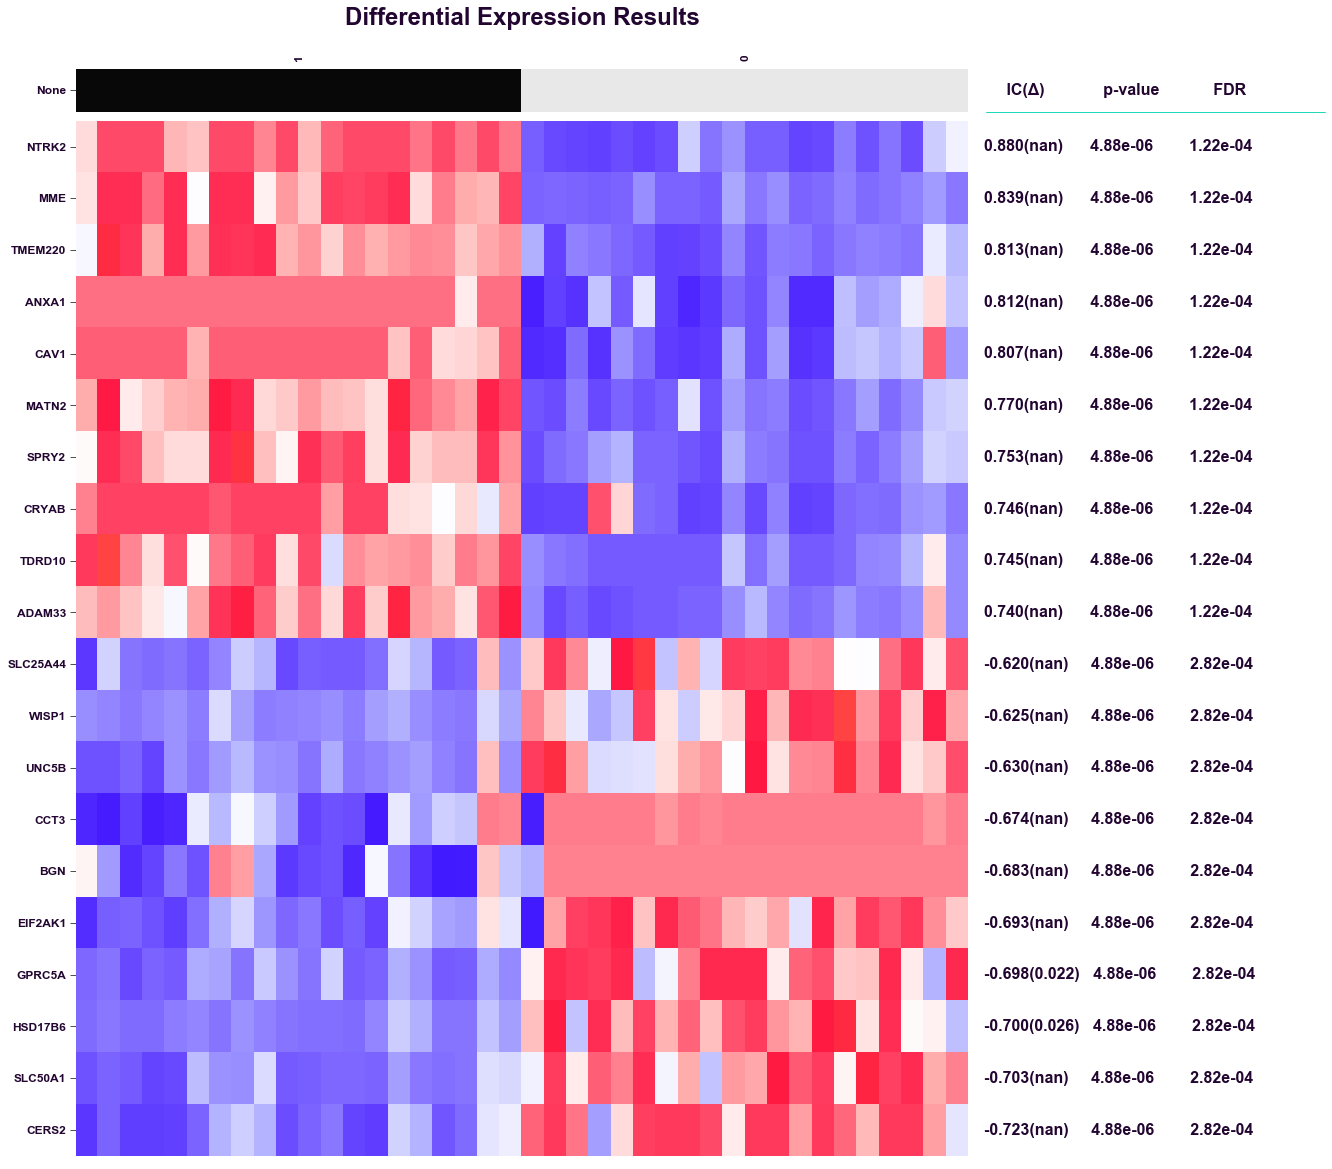

In [9]:
de_results = differential_gene_expression(gene_expression="https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_filtered.gct", phenotype_file="https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_labels.cls", output_filename="workshop_BRCA_de", ranking_method=compute_information_coefficient, max_number_of_genes_to_show=20, number_of_permutations=10, title="Differential Expression Results", random_seed=20121020)

In [10]:
de_results

,Score,0.95 MoE,p-value,FDR
Name,,,,
NTRK2,0.879922,NaN,0.000005,0.000122
MME,0.838596,NaN,0.000005,0.000122
TMEM220,0.812825,NaN,0.000005,0.000122
ANXA1,0.811732,NaN,0.000005,0.000122
CAV1,0.806605,NaN,0.000005,0.000122
MATN2,0.770420,NaN,0.000005,0.000122
SPRY2,0.753461,NaN,0.000005,0.000122
CRYAB,0.745917,NaN,0.000005,0.000122
TDRD10,0.745249,NaN,0.000005,0.000122


Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x10a7f7950> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 20 permutations ...
	1/20 ...
	3/20 ...
	5/20 ...
	7/20 ...
	9/20 ...
	11/20 ...
	13/20 ...
	15/20 ...
	17/20 ...
	19/20 ...
	20/20 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


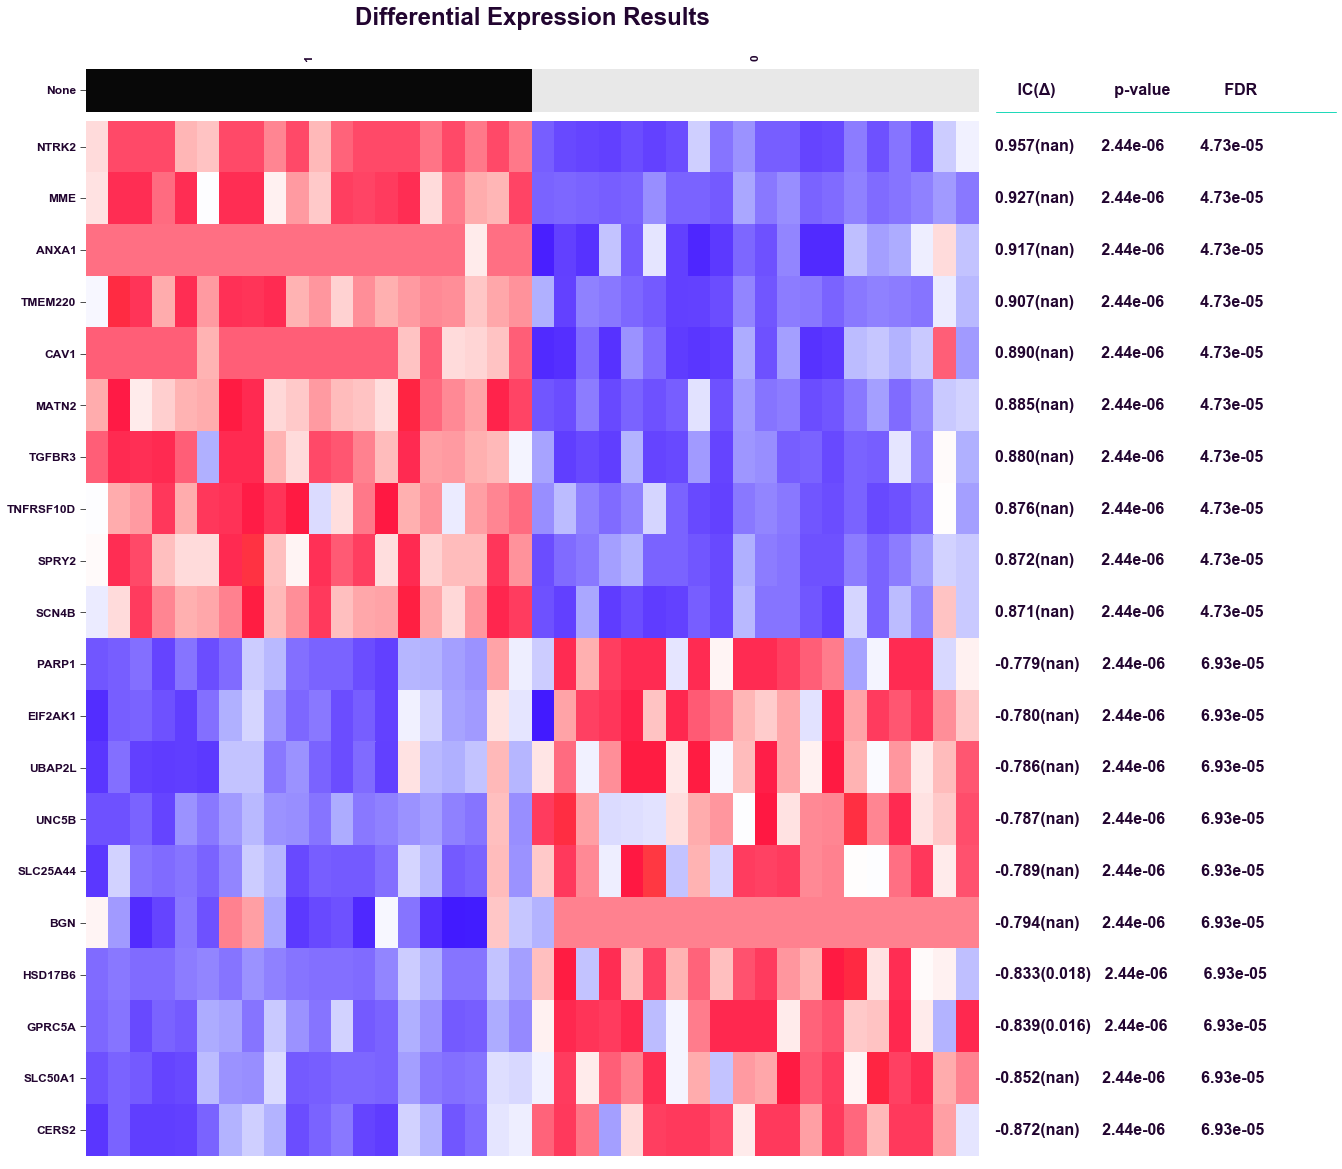

In [8]:
de_results = differential_gene_expression(gene_expression="https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_filtered.gct", phenotype_file="https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_labels.cls", output_filename="workshop_BRCA_de", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=20, title="Differential Expression Results", random_seed=20121020)

# Documentation

### Parameters
>1. **gene expression**
    1. Gene (or other) expression data filename (.gct or .txt file) or python DataFrame object where rows are genes and columns are samples.
        1. ex: workshop_BRCA_filtered.gct
2. **phenotype file**
    1. Phenotype of each sample in input_gene_expression file (array, Series where indices match , or row of GCT file)
        1. ex: workshop_BRCA_labels.cls
3. **max number of genes to show**
    1. The number of most differentially expressed genes to show in the output plot (e.g., if this value is 5, a total of 10 genes (up/down-regulated) will be shown for each phenotype comparison).
        1. 20 **(default)**
4. **ranking method** 
    1. The function used to perform the differential expression analysis. The choice of ranking_method also specifies the statistical significance calculation.
        1. Information coefficient **(default)** - accurate, but slow
        2. Pearson correlation - fast, but less accurate (linear associations only)
        3. Signal to noise ratio - 
        4. T-test statistic - over-optimistic
        5. Spearman correlation - useful for gene rankings
5. **number of permutations**
    1. Number of random permutations to estimate statistical significance (p-values and FDRs)
        1. 10 **(default)**

### Additional Notes
**Ranking Method:**  For non-linear and non-functional associationg, Pearson correlation is less adequate than other methods that are based on rank correlation or information-theory. (1) 

## Input
To use this module, you will need expression data (in the GCT or TXT file format) and the corresponding phenotype labels (in the CLS file format). Feel free to substitute your own data, for each of the example files.


> **Example Dataset**: For this dataset we have selected 40 RNASeq samples, 20 of those are Breast Cancer primary tumors (BRCA) and 20 are matched normal tissue.  
>
> The example dataset was downloaded from TCGA (<a href="https://portal.gdc.cancer.gov/">using the GDC data portal</a>):<br>
>>[**workshop_BRCA_labels.cls**](https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_labels.cls) - CLS file containing the samples' phenotype labels.
<br>[**workshop_BRCA_filtered.gct**](https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_filtered.gct) - We use a compilation of 40 RNASeq samples taken from TCGA, 20 of those are Breast Cancer primary tumors (BRCA) and 20 are matched normal tissue. This GCT file contains the HTSeq counts.

## Output
The Differential Gene Expression Module will output 

>1. **Differential_expression_heatmap**
    1. A PNG file of a heatmap showing the most differentially expressed genes in each phenotype comparison. Includes the confidence intervals for the metric and statistical significance results.
2. **Differential_expression_results**
    1. A tab-separated TXT file which contains the results of the entire differential expression analysis, the confidence intervals for the metric and statistical significance results.
3. **Returns**
    1. This function returns (python) a data frame showing the same genes as the heatmap (gene_to_show x 2 entries).

## Tutorial: Identification of differentially expressed genes from BRCA patient RNAseq data
In this tutorial, we will show you how to use the **Differential Expression Module** to identify differentially expressed genes from a preprocessed BRCA RNAseq dataset. 

### Step 1: Loading Data
<div class="alert alert-info">
1. First, load the expression data ([**workshop_BRCA_filtered.gct**](https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_filtered.gct)) into the `gene expression` field by pasting or dragging and dropping the url into the empty field.<br>
2. Then, load the corresponding phenotype label file ([**workshop_BRCA_labels.cls**](https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_labels.cls)) into the `phenotype file` field.
</div>

### Step 2: Set the Parameters
<div class="alert alert-info">
1. Next, set appropriate values for the corresponding parameters:<br>
`output filename`: workshop_BRCA_de<br>
`ranking method`: Information coefficient (can use Pearson for faster results, but it is less accurate)<br>
`title`: Differential gene expression in filtered TCGA BRCA RNAseq dataset<br>
`random seed`: 20121020 (arbitrary)<br>
`output variable`: de_results (useful for downstream analysis)<br>
2. Keep the remaining parameters as their default values.
</div>

See the [**Parameters**](#Parameters) section for more detailed descriptions of each parameter.

### Step 3: Run the Analysis
<div class="alert alert-info">
1. Now, run the analysis by pressing the `Run` button.
</div>

### Step 3: View Results and Interpretation
There are three ways to view the results of this analysis: 

**Heatmap** - 
By default, the module generates a heatmap from the differential expression analysis results, which will show the 10 most up- and down-regulated genes and their expression values across all 40 samples. The corresponding statistics and p-values are shown to the side.

**TXT File** - 
A TXT file will be automatically generated if the 

**Python variable (ex. Pandas Dataframe)** - 
If the parameter `output variable`  


- How to interpret these results
    - Discuss Heatmap
        - Define axes
            - Gene names
            - Expression level
            - 
        - Define color range (what they represent and their corresponding values)
    - Discuss IC/pearson scores (we could do either)
        - Reference the originial paper
    - 

## References
<small>
1. Cancer Genome Atlas Network. Comprehensive molecular portraits of human breast
tumours. Nature. 2012 Oct 4;490(7418):61-70. doi: 10.1038/nature11412. Epub 2012 
Sep 23. PubMed PMID: 23000897; PubMed Central PMCID: PMC3465532.
2. Benjamini Y, Hochberg Y. Controlling the False Discovery Rate: A Practical and Powerful Approach to Multiple Testing. Journal of the Royal Statistical Society. Series B (Methodological). 1995;57(1):289-300. 
2. Golub T, Slonim D, et al. Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression. Science. 1999;286:531-537. 
3. Good P. Permutation Tests: A Practical Guide for Testing Hypotheses, 2nd Ed. New York: Springer-Verlag. 2000. 
4. Gould J, Getz G, Monti S, Reich M, Mesirov JP. Comparative gene marker selection suite. Bioinformatics. 2006;22;1924-1925, doi:10.1093/bioinformatics/btl196. 
5. Lu J, Getz G, Miska E, et al. MicroRNA Expression Profiles Classify Human Cancers. Nature. 2005;435:834-838. 
6. Storey JD, Tibshirani R. Statistical significance for genomewide studies. PNAS. 2003;100(16):9440-9445. 
7. Westfall PH, Young SS. Resampling-Based Multiple Testing: Examples and Methods for p-Value Adjustment, in Wiley Series in Probability and Statistics. New York: Wiley, 1993.
</small>

<a href="#Differential-(gene)-Expression" class="btn btn-info" style="text-decoration:none;">To Top</a>